In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


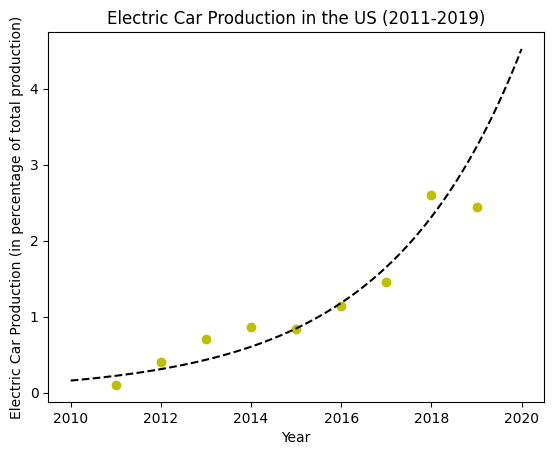

In [223]:
years = np.array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

totalCarProduction = np.array([8661535, 10332626, 11066432, 11660702, 12105988, 12180301, 11189985, 11297911, 10892884])
totalCarSales = np.array([12741800, 14433200, 15530100, 16452200, 17408000, 17477300, 17150100, 17224900, 16961100])
production = np.array([0.1, 0.4, 0.4*1.75, 0.4*1.75*1.24, 0.4*1.75*1.24*0.97, 0.4*1.75*1.24*0.97*1.36, 
                       0.4*1.75*1.24*0.97*1.36*1.27, 0.4*1.75*1.24*0.97*1.36*1.27*1.79, 0.4*1.75*1.24*0.97*1.36*1.27*1.79*0.94])

# Correctly create the production array using a list comprehension
#production = np.array([productionPercentageOfTotal[i] * totalCarProduction[i] for i in range(len(years))])

EVSales = np.array([117763, 53171, 97102, 118882, 114023, 159616, 195581, 361315, 326644])

carPrice = np.array([44600, 44900, 48300, 38600, 36500, 39900, 38600, 35700, 36900])
months = np.array(["Oct 2020", "Nov 2020", "Dec 2020", "Jan 2021", "Feb 2021", "Mar 2021", "Apr 2021", 
                   "May 2021", "Jun 2021", "Jul 2021", "Aug 2021", "Sep 2021", "Oct 2021", "Nov 2021", 
                   "Dec 2021", "Jan 2022", "Feb 2022", "Mar 2022", "Apr 2022", "May 2022", "Jun 2022", 
                   "Jul 2022", "Aug 2022", "Sep 2022", "Oct 2022", "Nov 2022", "Dec 2022", "Jan 2023", 
                   "Feb 2023", "Mar 2023", "Apr 2023", "May 2023", "Jun 2023", "Jul 2023", "Aug 2023", 
                   "Sep 2023", "Oct 2023", "Nov 2023"])
totalSemiTruckSales = np.array([37560, 38930, 37150, 42140, 38430, 41670, 40180, 40710, 39560, 37200, 35320, 36010, 35280, 36960, 39050, 35200, 36830, 39330, 37480,
                                 38580, 40200, 39330, 42750, 40870, 39660, 42880, 41480, 41740, 41980, 42390, 44310, 47040, 45000, 41960, 45330, 41760, 39550, 44990]) # by month

fit = np.polyfit(years, np.log(production), 1)
fit_fn = np.poly1d(fit)

x_fit = np.linspace(min(years) - 1, max(years) + 1, 100)

plt.plot(years, production, 'yo', label='Original Data')
plt.plot(x_fit, np.exp(fit_fn(x_fit)), '--k', label='Fitted Line')

plt.xlabel('Year')
plt.ylabel('Electric Car Production (in percentage of total production)')
plt.title('Electric Car Production in the US (2011-2019)')

#plt.legend()
plt.show()

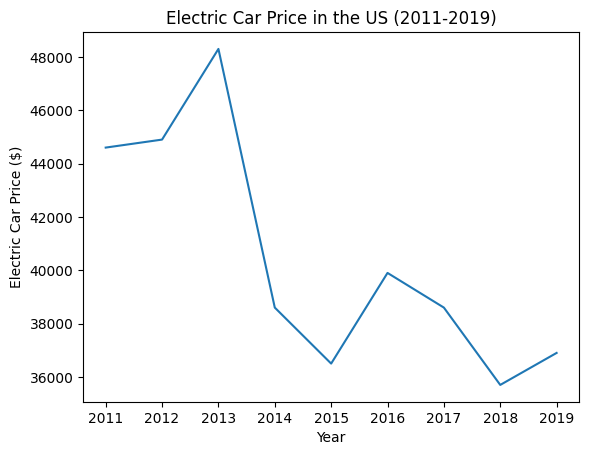

In [224]:
plt.plot(years, carPrice)
plt.xlabel('Year')
plt.ylabel('Electric Car Price ($)')
plt.title('Electric Car Price in the US (2011-2019)')
plt.show()

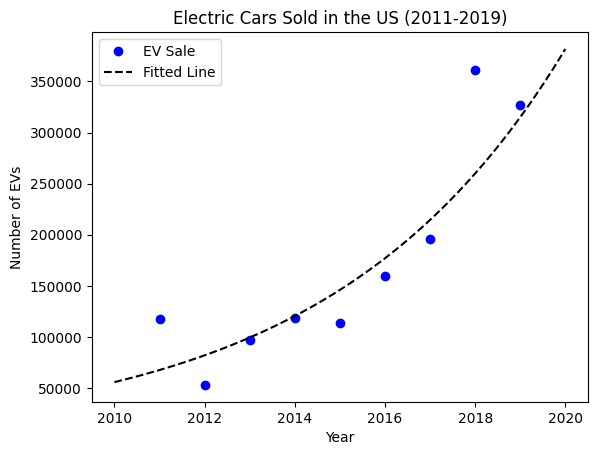

In [225]:
plt.xlabel('Year')
plt.ylabel('Number of EVs')
plt.title('Electric Cars Sold in the US (2011-2019)')

# Fit a linear regression to the logarithm of the sale data
fit = np.polyfit(years, np.log(EVSales), 1)
fit_fn = np.poly1d(fit)

x_fit = np.linspace(min(years) - 1, max(years) + 1, 100)

plt.plot(years, EVSales, 'bo', label='EV Sale')
plt.plot(x_fit, np.exp(fit_fn(x_fit)), '--k', label='Fitted Line')

plt.legend()
plt.show()

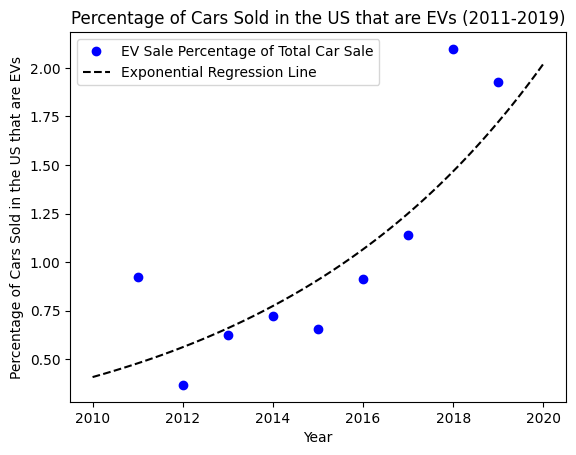

In [226]:
plt.xlabel('Year')
plt.ylabel('Percentage of Cars Sold in the US that are EVs')
plt.title('Percentage of Cars Sold in the US that are EVs (2011-2019)')

percentageSoldEVs = np.array([EVSales[i] / totalCarSales[i] * 100 for i in range(len(years))])

# Fit a linear regression to the logarithm of the sale data
fit = np.polyfit(years, np.log(percentageSoldEVs), 1)
fit_fn = np.poly1d(fit)

x_fit = np.linspace(min(years) - 1, max(years) + 1, 100)

plt.plot(years, percentageSoldEVs, 'bo', label='EV Sale Percentage of Total Car Sale')
plt.plot(x_fit, np.exp(fit_fn(x_fit)), '--k', label='Exponential Regression Line')

plt.legend()
plt.show()

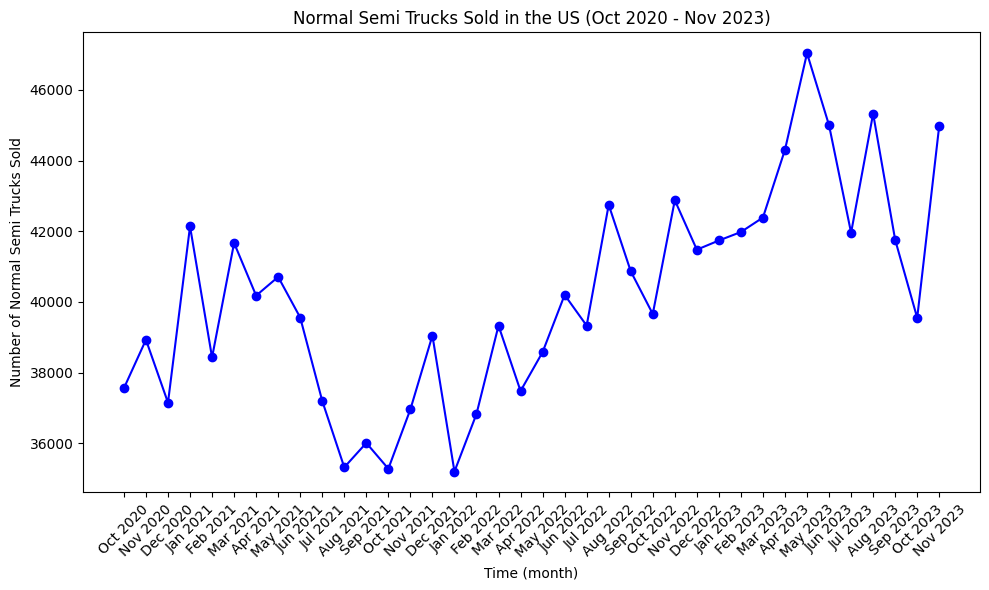

In [227]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))
plt.plot(months, totalSemiTruckSales, marker='o', linestyle='-', color='b')
plt.title('Normal Semi Trucks Sold in the US (Oct 2020 - Nov 2023)')
plt.xlabel('Time (month)')
plt.ylabel('Number of Normal Semi Trucks Sold')

plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labelrotation=45)

plt.tight_layout()
plt.show()